In [2]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

#local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

#pre_trained_model.load_weights(local_weights_file)
#we are freezing all layers of the model
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

87916544/87910968 [==============================] - 2s 0us/step
last layer output shape:  (None, 7, 7, 768)


In [4]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/sample_data/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2020-06-11 10:52:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/sample_data/cats_and_dogs_filtered.zip’

/content/sample_dat 100%[===================>]  65.43M  94.3MB/s    in 0.7s    

2020-06-11 10:52:17 (94.3 MB/s) - ‘/content/sample_data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



We use subset of cats Vs dogs dataset having train(cats-1000,dogs-1000) and validation(cats-500,dogs-500)

In [0]:
local_zip = '/content/sample_data/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [0]:
base_dir = '/content/sample_data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/train/cats/')))
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/train/dogs/')))
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/validation/cats/')))
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/validation/dogs/')))

1000
1000
500
500


We use image augmentation to reduce overfitting as well as we don't have enough data

In [9]:
TRAINING_DIR = '/content/sample_data/cats_and_dogs_filtered/train'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = '/content/sample_data/cats_and_dogs_filtered/validation'
validation_datagen = ImageDataGenerator(rescale=1/255)

# VALIDATION GENERATOR.
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/50
63/63 [==============================] - 23s 366ms/step - loss: 0.3643 - accuracy: 0.8545 - val_loss: 0.1625 - val_accuracy: 0.9290
Epoch 2/50
63/63 [==============================] - 21s 329ms/step - loss: 0.1934 - accuracy: 0.9135 - val_loss: 0.1111 - val_accuracy: 0.9480
Epoch 3/50
63/63 [==============================] - 21s 334ms/step - loss: 0.1805 - accuracy: 0.9240 - val_loss: 0.1089 - val_accuracy: 0.9540
Epoch 4/50
63/63 [==============================] - 21s 327ms/step - loss: 0.1736 - accuracy: 0.9390 - val_loss: 0.1020 - val_accuracy: 0.9540
Epoch 5/50
63/63 [==============================] - 21s 332ms/step - loss: 0.1686 - accuracy: 0.9260 - val_loss: 0.1129 - val_accuracy: 0.9560
Epoch 6/50
63/63 [==============================] - 21s 330ms/step - loss: 0.1654 - accuracy: 0.9345 - val_loss: 0.0928 - val_accuracy: 0.9600
Epoch 7/50
63/63 [==============================] - 21s 327ms/step - loss: 0.1538 - accuracy: 0.9395 - val_loss: 0.0930 - val_accuracy: 0.9640

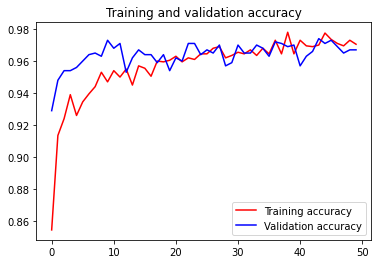

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


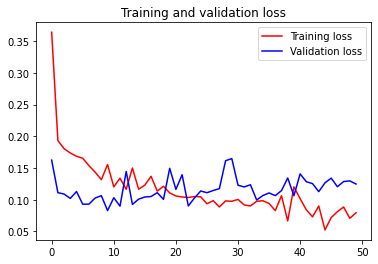

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()